In [1]:
from pycaret.regression import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

,total_bill,tip,sex,smoker,day,time,size
96,27.28,4.00,Male,Yes,Fri,Dinner,2
202,13.00,2.00,Female,Yes,Thur,Lunch,2
125,29.80,4.20,Female,No,Thur,Lunch,6
242,17.82,1.75,Male,No,Sat,Dinner,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2


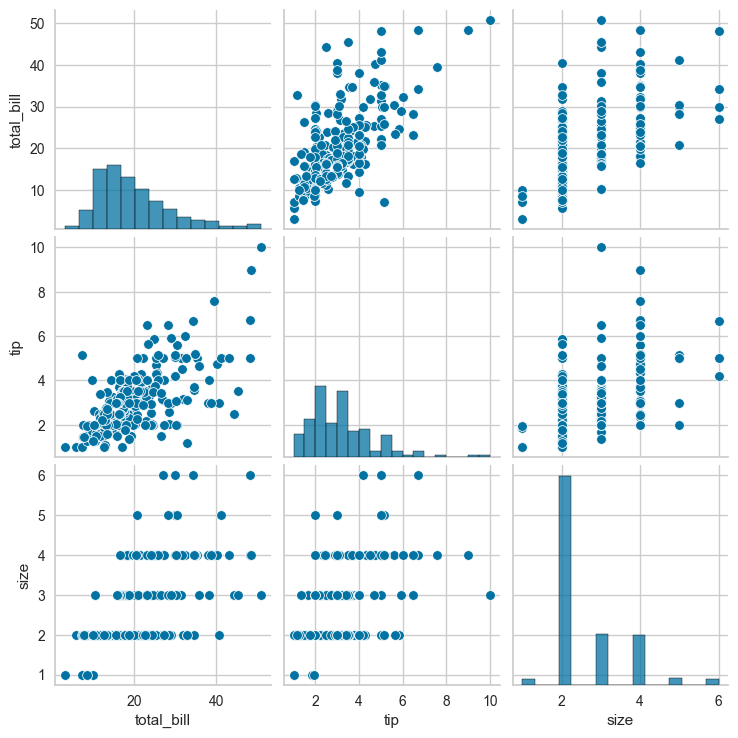

In [2]:
tips = sns.load_dataset('tips')
sns.pairplot(tips)
tips.sample(5)

In [3]:
tips['sex'] = tips['sex'].astype('category').cat.codes
tips['smoker'] = tips['smoker'].astype('category').cat.codes
tips['day'] = tips['day'].astype('category').cat.codes
tips['time'] = tips['time'].astype('category').cat.codes
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
28,21.70,4.30,0,1,2,1,2
160,21.50,3.50,0,1,3,1,4
134,18.26,3.25,1,1,0,0,2
27,12.69,2.00,0,1,2,1,2
137,14.15,2.00,1,1,0,0,2


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tips, test_size=0.2, random_state=42)

In [5]:
regression_setup = setup(
    data = train,
    target = 'tip',
    session_id = 123,
    normalize = True,
    remove_multicollinearity = True,
    log_experiment = False,
    experiment_name = 'tips_regression',
    verbose=False 
)

In [6]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.7922,1.1403,1.0402,0.3625,0.2428,0.2917,0.0470
lightgbm,Light Gradient Boosting Machine,0.7794,1.1427,1.0397,0.3595,0.2439,0.2936,0.1210
br,Bayesian Ridge,0.8048,1.1538,1.0521,0.3576,0.2465,0.3054,0.0310
ridge,Ridge Regression,0.8019,1.1615,1.0529,0.3519,0.2460,0.3017,0.0330
lr,Linear Regression,0.8020,1.1639,1.0537,0.3504,0.2461,0.3014,1.6860
lar,Least Angle Regression,0.8020,1.1639,1.0537,0.3504,0.2461,0.3014,0.0710
knn,K Neighbors Regressor,0.8191,1.1529,1.0613,0.3386,0.2620,0.3159,0.0910
omp,Orthogonal Matching Pursuit,0.8159,1.2024,1.0721,0.3332,0.2498,0.3090,0.0590
catboost,CatBoost Regressor,0.8645,1.2732,1.0985,0.2849,0.2659,0.3283,1.2420
et,Extra Trees Regressor,0.8811,1.2918,1.1195,0.2733,0.2720,0.3366,0.1660


In [16]:
selected_model = create_model('lightgbm')
print(selected_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9439,1.2734,1.1285,0.0897,0.2778,0.3765
1,1.1363,1.9542,1.3979,0.2114,0.2873,0.2971
2,0.8769,1.2011,1.0960,0.1199,0.3263,0.4965
3,0.7857,1.5114,1.2294,-0.0079,0.2721,0.2418
4,0.7929,1.0777,1.0381,0.2314,0.2774,0.3698
5,0.7018,0.8223,0.9068,0.6211,0.2100,0.2784
6,0.6493,0.8651,0.9301,0.4871,0.2008,0.1952
7,0.5954,0.6669,0.8166,0.5272,0.2265,0.2958
8,0.9143,1.7869,1.3368,0.4688,0.2204,0.2163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=123)


In [18]:
tuned_lightgbm = tune_model(selected_model, optimize='MAE')
evaluate_model(tuned_lightgbm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
predictions = predict_model(tuned_lightgbm, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.7496,0.8959,0.9465,0.2832,0.2518,0.3347


In [22]:
save_model(tuned_lightgbm, 'tuned_lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['total_bill', 'sex', 'smoker',
                                              'day', 'time', 'size'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'tuned_lightgbm_model.pkl')